

The Objectives of this notebook is to Create Several Candidate High Performing Machine Learning Models To Predict Expected Delivery time




**WORKFLOW**
The workflow is as follows:
1. Data Loading And Understanding
2. Data Cleaning
3. Exploratory Data Analysis
4. Feature Engineering and Categorical Encoding
5. Feature Selection
6. Modelling and Models Selection
7. Hyperparameter Tuning
8. Ensembling Models
9. Deploying via Flask App

In [37]:
##more comments especialy explaining the end results of visualization and what your doing as you are doing it

****DATA LOADING AND UNDERSTANDING****

In [38]:
import pandas as pd

In [39]:

#loading the data
data = pd.read_csv("/content/BetterLogisticsPro Delivery Dataset.csv")

In [40]:
#checking out the frst 10 rows
data.head(10)

,Delivery_ID,Delivery_Start_Date,Delivery_Start_Time,Traffic_Conditions,Number_of_Packages,Customer_Preference_for_Delivery_Time,Distance_(miles),fog,rain,snow,hail,Historical_Delivery_Time_(hours)
0,1.0,2020-09-03,12:41:00,Low,7.0,Evening,167.884751,NaN,NaN,Low,NaN,9.294688
1,2.0,2022-12-22,20:14:00,Low,10.0,Morning,154.154474,Low,NaN,Mid,NaN,9.303765
2,3.0,2021-06-05,11:20:00,High,2.0,Afternoon,196.084835,NaN,Mid,NaN,NaN,8.734668
3,4.0,2023-05-02,05:50:00,High,15.0,Morning,94.010339,NaN,NaN,NaN,NaN,7.806979
4,5.0,2020-07-07,02:34:00,Moderate,17.0,Evening,202.254271,Mid,NaN,NaN,NaN,12.770403
5,6.0,2021-01-08,06:46:00,High,7.0,Evening,142.464202,NaN,Low,NaN,NaN,6.731095
6,7.0,2021-11-02,05:25:00,Low,17.0,Afternoon,193.844452,NaN,Mid,NaN,NaN,9.108041
7,8.0,2022-03-01,16:44:00,High,6.0,Evening,145.056879,NaN,NaN,NaN,NaN,5.977140
8,9.0,2023-02-15,18:46:00,High,18.0,Evening,155.081309,NaN,Mid,NaN,NaN,7.241487
9,10.0,2021-09-16,22:31:00,Low,1.0,Evening,137.508941,NaN,Low,NaN,NaN,3.718040


In [41]:
data.tail()

,Delivery_ID,Delivery_Start_Date,Delivery_Start_Time,Traffic_Conditions,Number_of_Packages,Customer_Preference_for_Delivery_Time,Distance_(miles),fog,rain,snow,hail,Historical_Delivery_Time_(hours)
131003,457.0,2021-01-24,16:13:00,High,13.0,Evening,108.394852,High,Mid,NaN,Low,8.332241
131004,111314.0,2020-01-19,23:32:00,Low,19.0,Afternoon,82.720908,NaN,Mid,NaN,NaN,7.115075
131005,1233.0,2021-05-21,10:12:00,Low,11.0,Afternoon,148.500574,Mid,NaN,NaN,NaN,7.691267
131006,2536.0,2021-11-21,22:52:00,Low,1.0,Morning,6.311203,Low,NaN,NaN,NaN,1.710512
131007,457.0,2021-01-24,16:13:00,High,13.0,Evening,108.394852,High,Mid,NaN,Low,8.332241


**DATA CLEANING**

In [42]:
#checking for mising vales
data.isna().sum()

,0
Delivery_ID,3
Delivery_Start_Date,1
Delivery_Start_Time,1
Traffic_Conditions,0
Number_of_Packages,2
Customer_Preference_for_Delivery_Time,0
Distance_(miles),1
fog,78764
rain,78739
snow,91828


In [43]:
#dropping rows with missing values
data.dropna(axis = 0, inplace = True)

In [44]:
##checking for duplicates
# Check for duplicate rows based on all columns
duplicates = data[data.duplicated()]

In [45]:

duplicates

,Delivery_ID,Delivery_Start_Date,Delivery_Start_Time,Traffic_Conditions,Number_of_Packages,Customer_Preference_for_Delivery_Time,Distance_(miles),fog,rain,snow,hail,Historical_Delivery_Time_(hours)


In [46]:
#droppping duplicates
data = data.drop_duplicates(keep='first')

In [47]:

data.isna().sum()

,0
Delivery_ID,0
Delivery_Start_Date,0
Delivery_Start_Time,0
Traffic_Conditions,0
Number_of_Packages,0
Customer_Preference_for_Delivery_Time,0
Distance_(miles),0
fog,0
rain,0
snow,0


**IN THE DATA CLEANING PHASE OF THE WORKFLOW, WE HAVE CLEANED OUT MISSING VALUES AND DROPPED DUPLICATES**

****EXPLORATORY DATA ANALYSIS:** Lets observe the relationships between the columns and the target variables**

In [48]:
import matplotlib.pyplot as plt

import seaborn as sns
#make visualizations in multiple cells and columns

<Axes: >

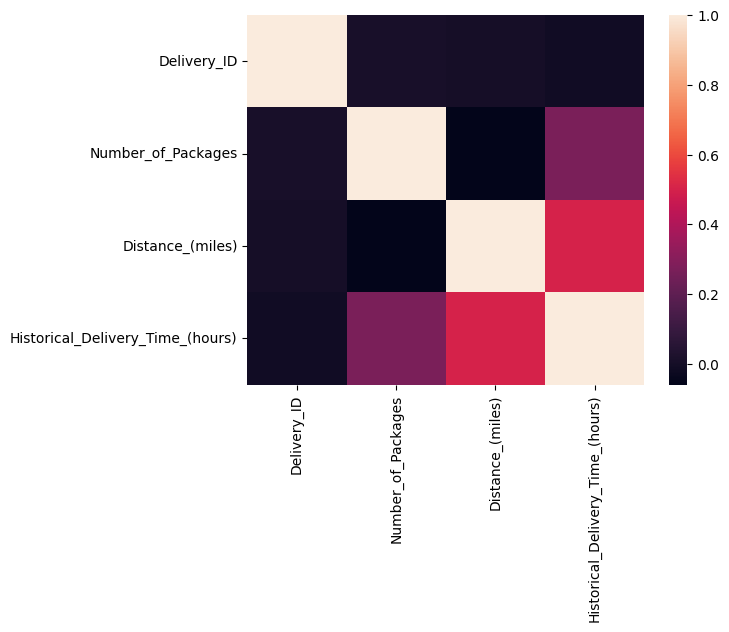

In [49]:
##first things first, a correlation heatmap
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix)

#seems to be a slight correlation between snumber of packages and deivery time  ==> could imply that a driver handling multiple deliveries
#leads to later delvery times for later product

#also not suprising =, distance and delivery time show stron correlation

In [50]:
data.columns

Index(['Delivery_ID', 'Delivery_Start_Date', 'Delivery_Start_Time',
       'Traffic_Conditions', 'Number_of_Packages',
       'Customer_Preference_for_Delivery_Time', 'Distance_(miles)', 'fog',
       'rain', 'snow', 'hail', 'Historical_Delivery_Time_(hours)'],
      dtype='object')

In [51]:
##seperating out by columns : cat_columns, num_columns, date_time
date_time_columns = ['Delivery_Start_Date','Delivery_Start_Time',]
cat_columns = ["Traffic_Conditions", "Customer_Preference_for_Delivery_Time",'fog','rain', 'snow', 'hail']
num_columns = [col for col in data.columns if col not in ['Historical_Delivery_Time_(hours)'] + cat_columns + date_time_columns]

In [52]:
num_columns

['Delivery_ID', 'Number_of_Packages', 'Distance_(miles)']

In [53]:
cat_columns

['Traffic_Conditions',
 'Customer_Preference_for_Delivery_Time',
 'fog',
 'rain',
 'snow',
 'hail']

In [54]:
date_time_columns

['Delivery_Start_Date', 'Delivery_Start_Time']

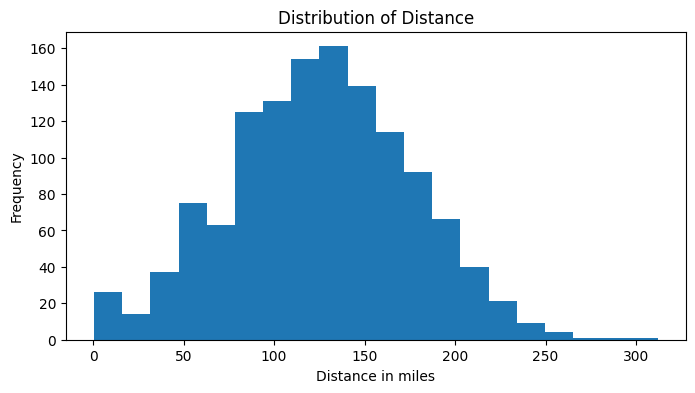

In [55]:
#Univariate distribution plot
#specify figure size
plt.figure(figsize=(8, 4))
#select and plot data
data['Distance_(miles)'].plot(kind='hist', bins=20)
#give it a title
plt.title(f'Distribution of Distance')
#give it a x label
plt.xlabel('Distance in miles')
#give it a y label
plt.ylabel('Frequency')
#show figure
plt.show()

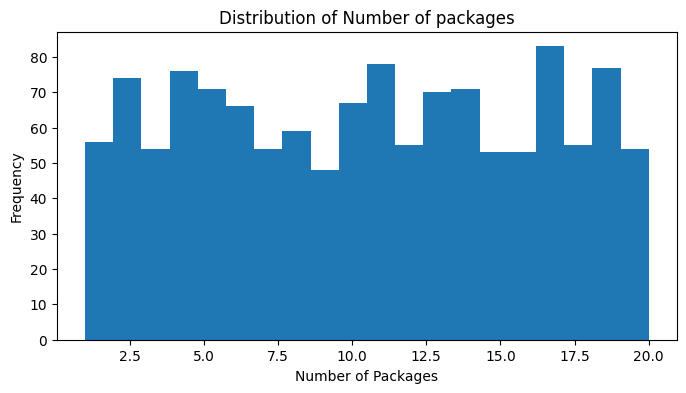

In [56]:
#lets do the same thing for number of packages
#specify figure size
plt.figure(figsize=(8, 4))
#select and plot data
data['Number_of_Packages'].plot(kind='hist', bins=20)
#give it a title
plt.title(f'Distribution of Number of packages')
#give it a x label
plt.xlabel('Number of Packages')
#give it a y label
plt.ylabel('Frequency')
#show figure
plt.show()

In [57]:
cat_columns

['Traffic_Conditions',
 'Customer_Preference_for_Delivery_Time',
 'fog',
 'rain',
 'snow',
 'hail']

In [58]:


#creating Categotcal count plot
def create_dist_plot(col):
  plt.figure(figsize=(8, 4))
  data[col].value_counts().plot(kind='bar')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()

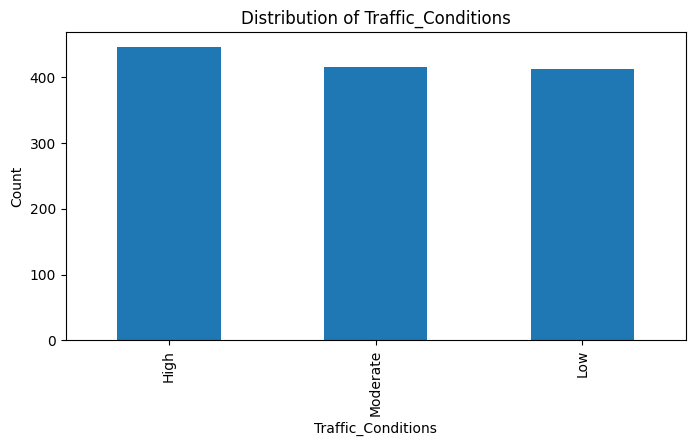

In [59]:
create_dist_plot("Traffic_Conditions")

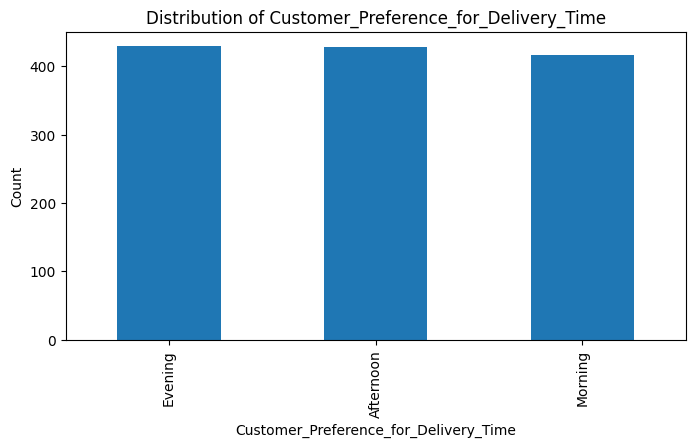

In [60]:
create_dist_plot(cat_columns[1])

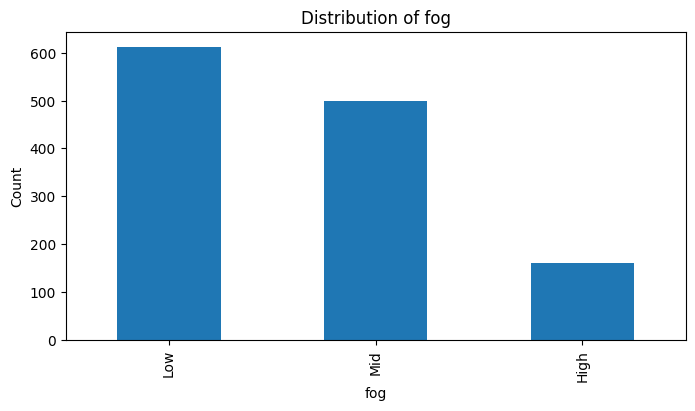

In [61]:
create_dist_plot(cat_columns[2])

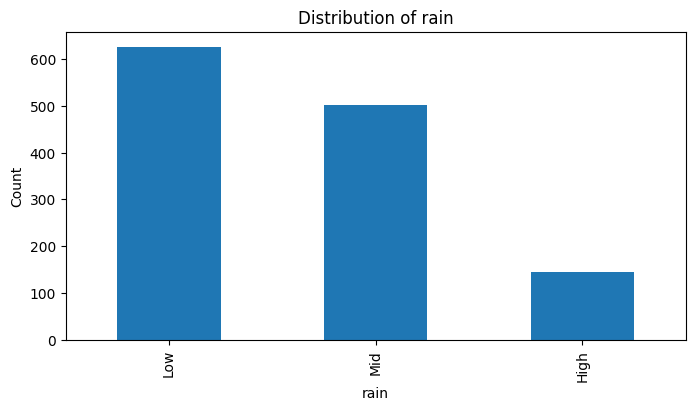

In [62]:
create_dist_plot(cat_columns[3])

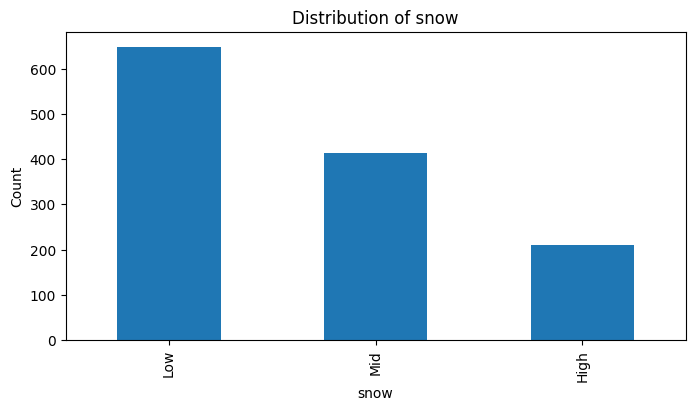

In [63]:
create_dist_plot(cat_columns[4])

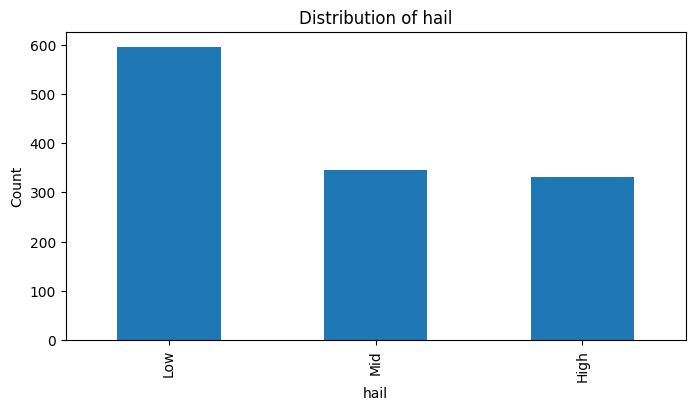

In [64]:
create_dist_plot(cat_columns[5])

In [65]:
###lets see the impact of these weather conditons on delivery time

<Axes: xlabel='hail', ylabel='Historical_Delivery_Time_(hours)'>

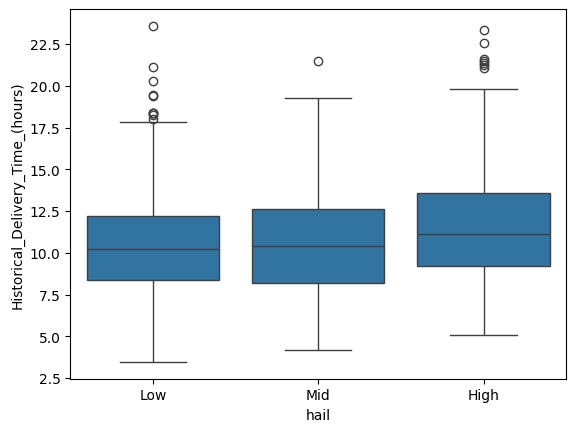

In [66]:
sns.boxplot(data =data , x ="hail" , y ="Historical_Delivery_Time_(hours)" )

<Axes: xlabel='rain', ylabel='Historical_Delivery_Time_(hours)'>

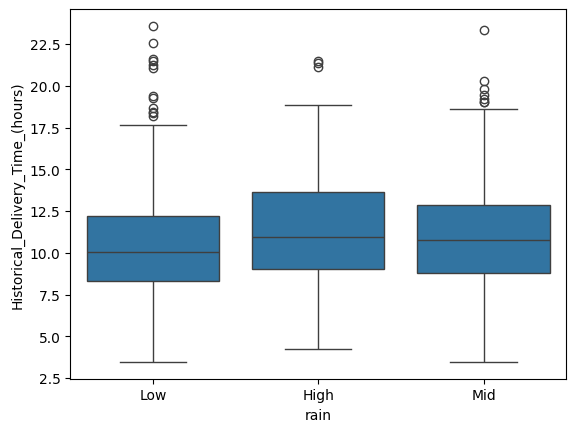

In [67]:
sns.boxplot(data =data , x ="rain" , y ="Historical_Delivery_Time_(hours)" )

<Axes: xlabel='fog', ylabel='Historical_Delivery_Time_(hours)'>

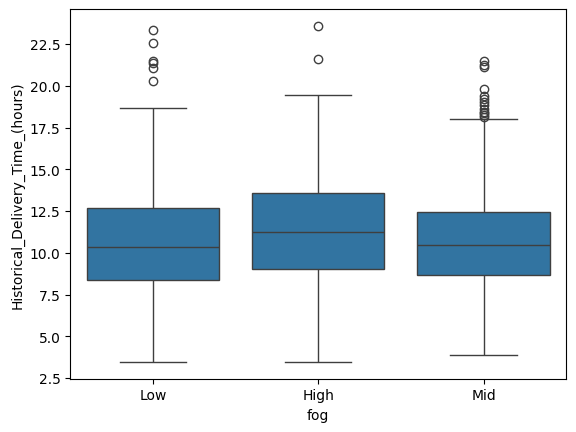

In [68]:
sns.boxplot(data =data , x ="fog" , y ="Historical_Delivery_Time_(hours)" )

<Axes: xlabel='snow', ylabel='Historical_Delivery_Time_(hours)'>

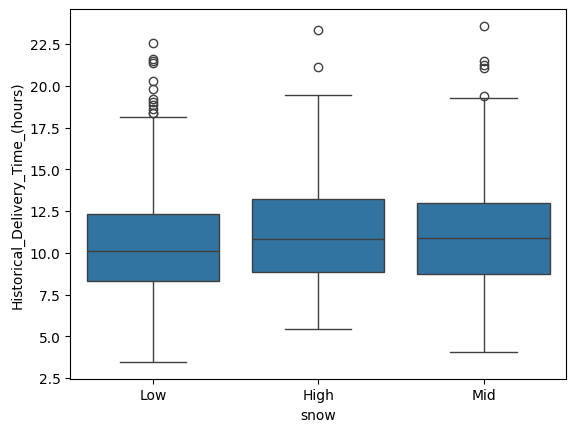

In [69]:
sns.boxplot(data =data , x ="snow" , y ="Historical_Delivery_Time_(hours)" )

**FEATURE ENGINEERING**

In [70]:
#so we are going to perform feature engineering and label encodng of the data in our dataset
#for the date column ==> month, year, day of week
#for the time column ==> period of the day(morning, afternoo or night)
data['year_of_delvery'] =pd.to_datetime(data['Delivery_Start_Date']).apply(lambda x: x.year)
data['month_of_delvery'] = pd.to_datetime(data['Delivery_Start_Date']).apply(lambda x: x.month)
data['day_of_delvery'] = pd.to_datetime(data['Delivery_Start_Date']).apply(lambda x: x.day_of_week)

In [71]:
data

,Delivery_ID,Delivery_Start_Date,Delivery_Start_Time,Traffic_Conditions,Number_of_Packages,Customer_Preference_for_Delivery_Time,Distance_(miles),fog,rain,snow,hail,Historical_Delivery_Time_(hours),year_of_delvery,month_of_delvery,day_of_delvery
106,107.0,2022-05-18,03:35:00,High,13.0,Morning,125.926583,Low,Low,Low,Low,12.353761,2022,5,2
193,194.0,2023-10-28,07:55:00,Low,3.0,Morning,185.501994,Low,Low,Low,Mid,7.942314,2023,10,5
240,241.0,2020-12-10,05:37:00,Moderate,11.0,Morning,91.518198,High,Low,High,Low,13.157350,2020,12,3
266,267.0,2022-09-13,23:50:00,High,14.0,Evening,191.963738,Low,High,Mid,High,10.610884,2022,9,1
304,305.0,2021-07-02,08:06:00,High,20.0,Evening,171.415035,Low,Low,Low,Low,14.218450,2021,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130492,130493.0,2020-09-23,17:00:00,High,15.0,Afternoon,161.811704,Low,Mid,Mid,Low,9.570188,2020,9,2
130518,130519.0,2020-05-16,04:45:00,High,16.0,Evening,65.168549,High,Low,High,High,8.651244,2020,5,5
130735,130736.0,2020-06-08,21:28:00,Low,5.0,Morning,143.437112,Low,Low,Mid,Low,9.438782,2020,6,0
130820,130821.0,2020-11-02,07:57:00,Moderate,17.0,Afternoon,80.996520,Mid,Mid,Low,Low,15.093075,2020,11,0


In [72]:

#label encoding for traffic and weather conditions
###mapping traffic and weather to numbers
mapper = {
    "None": 0,
    "Low" :1,
    "Mid": 2,
    "Moderate": 2,
    "High": 3

}

data['hail'] = data['hail'].map(mapper)
data['fog'] = data['fog'].map(mapper)
data['snow'] = data['snow'].map(mapper)
data['rain'] = data['rain'].map(mapper)

data["Traffic_Conditions"] = data["Traffic_Conditions"].map(mapper)



In [73]:
data['Customer_Preference_for_Delivery_Time'].unique()

array(['Morning', 'Evening', 'Afternoon'], dtype=object)

In [74]:
#customer prefrenece also labeled alongside period of the day
customer_preference = {
    "Evening": 3,
    "Afternoon":2,
    "Morning":1
}

data['Customer_Preference_for_Delivery_Time'] = data['Customer_Preference_for_Delivery_Time'].map(customer_preference)

In [75]:
data['Customer_Preference_for_Delivery_Time']

,Customer_Preference_for_Delivery_Time
106,1
193,1
240,1
266,3
304,3
...,...
130492,2
130518,3
130735,1
130820,2


**FEATURE SELECTION**

<Axes: >

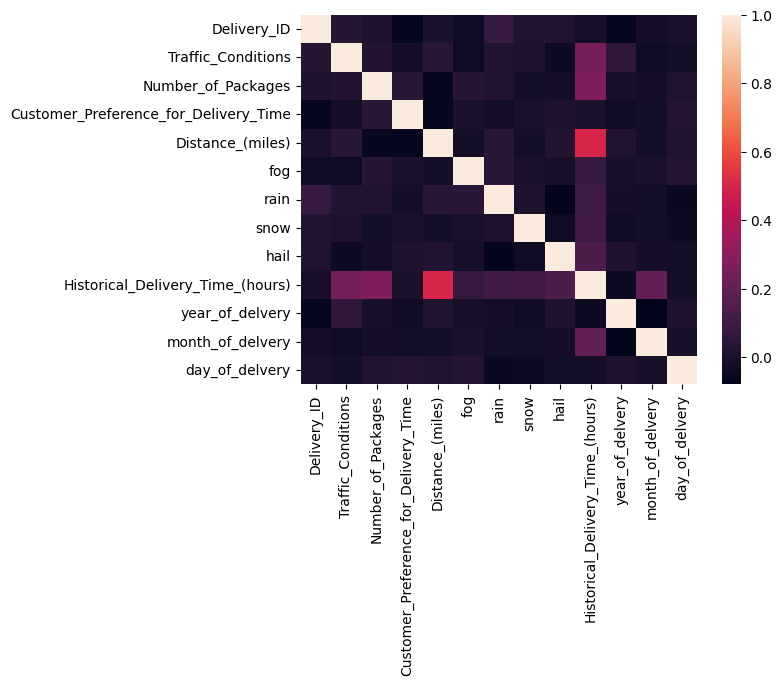

In [77]:
#geneate correlation heatmap
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix)

In [78]:
#with the exception of day, year of delivery,  and delivery id, the remainng feature shows a bit of correlation

In [79]:
features = ['Traffic_Conditions', 'Number_of_Packages',
       'Customer_Preference_for_Delivery_Time', 'Distance_(miles)', 'fog',
       'rain','snow', 'hail','year_of_delvery', 'month_of_delvery', 'day_of_delvery']

target = "Historical_Delivery_Time_(hours)"

In [80]:
from sklearn.model_selection import train_test_split

# Your dataset and target variable (X and y)
X = data[features]# Features
y = data[target]# Target variable

# Split the dataset into a training set (e.g., 80%) and a testing set (e.g., 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


In [82]:

#use simple random forest model to determine the best features
# Create a Random Forest Classifier
rf_classifier = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to your data
rf_classifier.fit(X_train, y_train)

# Get feature importances from the model
importances = rf_classifier.feature_importances_

# Get feature names (assuming you have them)
feature_names = features

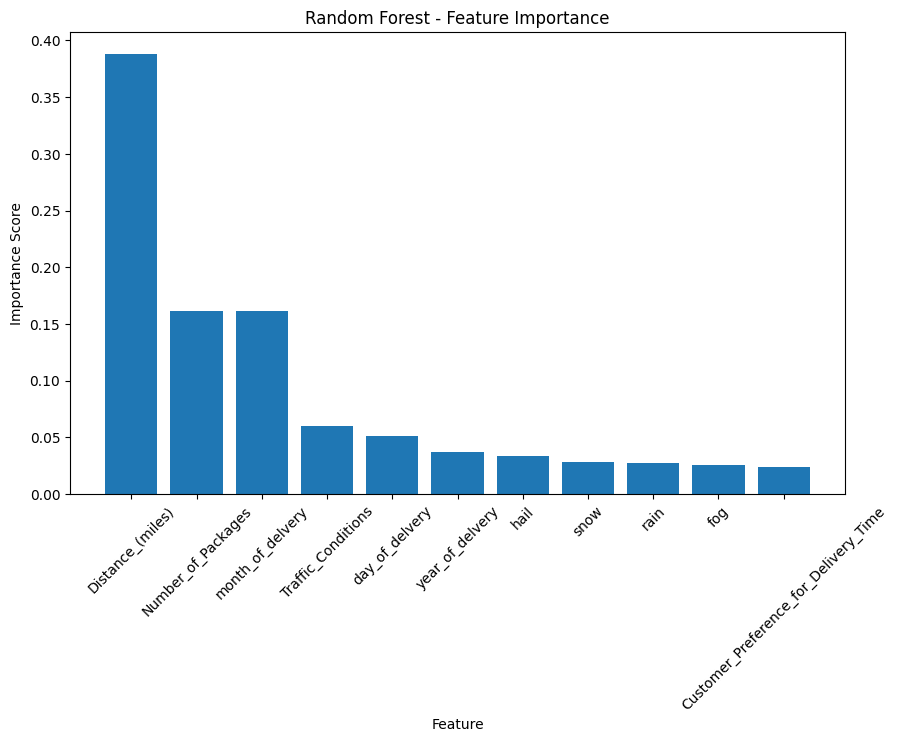

In [83]:
# Sort feature importances in descending order, and return the indice
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Random Forest - Feature Importance")

plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

In [84]:
#selecting the best features from these models' insights

features = ['Traffic_Conditions',
 'Number_of_Packages',
 'Distance_(miles)',
 'fog',
 'rain',
 'snow',
 'hail',
 'month_of_delvery',]

**The most important features(features that direct the models are
'Traffic_Conditions'
 'Number_of_Packages'
 'Distance_(miles)'
 'fog'
 'rain'
 'snow'
 'hail'
 'month_of_delvery'**

In [85]:
X = data[features]



****MODELING AND MODEL SELECTION****

In [86]:
#train models from tree based/ensemble
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have your X and y data loaded already

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Training and evaluation loop
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate RMSE, MAE, and MAPE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE in percentage

    # Print the results
    print(f"Model: {model_name}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print("=" * 40)


Model: Decision Tree
RMSE: 2.89
MAE: 2.28
MAPE: 22.25%
Model: Random Forest
RMSE: 2.23
MAE: 1.80
MAPE: 17.43%
Model: Gradient Boosting
RMSE: 2.17
MAE: 1.78
MAPE: 17.16%


In [87]:
#neigbors
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have your X and y data loaded already

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor models with different values of k
k_values = [1, 3, 5, 7, 9]  # You can adjust these values
models = {f"KNN (k={k})": KNeighborsRegressor(n_neighbors=k) for k in k_values}

# Training and evaluation loop
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate RMSE, MAE, and MAPE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE in percentage

    # Print the results
    print(f"Model: {model_name}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print("=" * 40)


Model: KNN (k=1)
RMSE: 3.21
MAE: 2.58
MAPE: 24.40%
Model: KNN (k=3)
RMSE: 2.74
MAE: 2.19
MAPE: 20.96%
Model: KNN (k=5)
RMSE: 2.55
MAE: 2.06
MAPE: 19.87%
Model: KNN (k=7)
RMSE: 2.56
MAE: 2.09
MAPE: 20.22%
Model: KNN (k=9)
RMSE: 2.49
MAE: 2.02
MAPE: 19.54%


In [88]:
#linear models
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have your X and y data loaded already

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear models
linear_regressor = LinearRegression()
lasso_regressor = Lasso(alpha=1.0)
ridge_regressor = Ridge(alpha=1.0)
elasticnet_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Create a dictionary of models
models = {
    "Linear Regression": linear_regressor,
    "Lasso Regression": lasso_regressor,
    "Ridge Regression": ridge_regressor,
    "Elastic Net": elasticnet_regressor
}

# Training and evaluation loop for each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate RMSE, MAE, and MAPE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE in percentage

    # Print the results
    print(f"Model: {model_name}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print("=" * 40)


Model: Linear Regression
RMSE: 2.19
MAE: 1.78
MAPE: 17.43%
Model: Lasso Regression
RMSE: 2.47
MAE: 1.99
MAPE: 19.68%
Model: Ridge Regression
RMSE: 2.19
MAE: 1.78
MAPE: 17.43%
Model: Elastic Net
RMSE: 2.43
MAE: 1.96
MAPE: 19.35%


In [71]:
#select top performing models


the top performing models are : Random Forest, Gradient Boosting and KNN


**HYPERPARAMETER TUNING USING GRID SEARCH**


Imporoving Random Forest Using Grid serach

In [89]:
#for top performing models, implement grid search
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have your X and y data loaded already

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Define the hyperparameters and their possible values for the grid search
param_grid = {
    'n_estimators': [100],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of each tree
    'min_samples_split': [ 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [ 2, 4],   # Minimum number of samples required at each leaf node
}

# Create the grid search
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:")
print(grid_search.best_params_)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
RMSE: 2.28
MAE: 1.86


**Impoving Gradient Boosting Regressor Using Grid serach**

In [90]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have your X and y data loaded already

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Define the hyperparameters and their possible values for the grid search
param_grid = {
    'n_estimators': [100],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 4, 5],  # Maximum depth of individual trees
}

# Create the grid search
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_gb_model = grid_search.best_estimator_

# Make predictions
y_pred = best_gb_model.predict(X_test)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:")
print(grid_search.best_params_)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
RMSE: 2.19
MAE: 1.80


**Impoving K nerest Neighbor Regressor Using Grid serach**

In [91]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have your X and y data loaded already

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN Regressor
knn_regressor = KNeighborsRegressor()

# Define the hyperparameters and their possible values for the grid search
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting strategy for neighbors
}

# Create the grid search
grid_search = GridSearchCV(estimator=knn_regressor, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_knn_model = grid_search.best_estimator_

# Make predictions
y_pred = best_knn_model.predict(X_test)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:")
print(grid_search.best_params_)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Hyperparameters:
{'n_neighbors': 9, 'weights': 'distance'}
RMSE: 2.48
MAE: 2.02


In [92]:
#get final models configuration
final_rf = RandomForestRegressor(n_estimators =  100,max_depth=  20, min_samples_leaf =  4, min_samples_split = 10)
final_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10)

In [93]:
final_knn = KNeighborsRegressor(n_neighbors =  11, weights = "distance")
final_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11, weights='distance')

****ENSEMBLING MODELS:STACKING VS AVERAGING****

In [ ]:
!pip install flask==2.3.3
!pip install flask pandas scikit-learn

In [94]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Initialize the base models
final_rf = RandomForestRegressor(n_estimators =  100,max_depth=  20, min_samples_leaf =  4, min_samples_split = 10)
final_gb = GradientBoostingRegressor(learning_rate = 0.2, max_depth = 3, n_estimators=100)
final_knn = KNeighborsRegressor(n_neighbors =  11, weights = "distance")



# Create a list of base models
base_models = [('KNN', final_knn), ('GBR', final_gb), ('RFR', final_rf)]

# Initialize the meta-model (Linear Regression in this case)
meta_model = LinearRegression()

# Create the stacking ensemble
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Fit the stacking ensemble to the data
stacking_regressor.fit(X_train, y_train)

# Make predictions
y_pred = stacking_regressor.predict(X_test)

# Evaluate the ensemble
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Stacking Ensemble RMSE: {rmse:.2f}")
print(f"Stacking Ensemble MAE: {mae:.2f}")


Stacking Ensemble RMSE: 2.19
Stacking Ensemble MAE: 1.78


In [95]:
from sklearn.ensemble import VotingRegressor

# Initialize the base models
final_rf = RandomForestRegressor(n_estimators =  100,max_depth=  20, min_samples_leaf =  4, min_samples_split = 10)
final_gb = GradientBoostingRegressor(learning_rate = 0.2, max_depth = 3, n_estimators=100)
final_knn = KNeighborsRegressor(n_neighbors =  11, weights = "distance")


# Create a list of base models
base_models = [('KNN', final_knn), ('GBR', final_gb), ('RFR', final_rf)]

# Initialize the ensemble (VotingRegressor with averaging)
ensemble_regressor = VotingRegressor(estimators=base_models)

# Fit the ensemble to the data
ensemble_regressor.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_regressor.predict(X_test)

# Evaluate the ensemble
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Averaging Ensemble RMSE: {rmse:.2f}")
print(f"Averaging Ensemble MAE: {mae:.2f}")


Averaging Ensemble RMSE: 2.22
Averaging Ensemble MAE: 1.83


****FLASK APP FOR MAKING PREDICTONS ON NEW TEST/INFORMATION****

In [ ]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd # Import pandas for data handling if needed
from sklearn.ensemble import RandomForestRegressor # Import the model you want to save

app = Flask(__name__)

# Assuming `final_rf` is your trained RandomForestRegressor model
model = RandomForestRegressor(n_estimators =  100,max_depth=  20, min_samples_leaf =  4, min_samples_split = 10)
# Fit the model if not already done
model.fit(X_train, y_train) # Replace X_train, y_train with your training data

# Save the trained model to a file
with open('your_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Now load the trained model from the saved file
with open('your_model.pkl', 'rb') as file:
    model = pickle.load(file)

@app.route('/predict', methods=['POST'])
def predict():
    # Get the input data from the request
    data = request.get_json()

    # Convert the JSON data to a pandas DataFrame (if needed)
    # input_df = pd.DataFrame([data])

    # Make predictions using the loaded model
    prediction = model.predict([data])  # Assuming data is a list of features

    # Return the prediction as a JSON response
    return jsonify({'prediction': prediction[0]})  # prediction[0] to get the value

if __name__ == '__main__':
    app.run(debug=True)